In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima       

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\lasra\Downloads\TLRESCONS.csv",index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

259
            Total Construction Spending: Residential in the United States
DATE                                                                     
2002-01-01                                             382979            
2002-02-01                                             391434            
2002-03-01                                             390942            
2002-04-01                                             404255            
2002-05-01                                             399164            


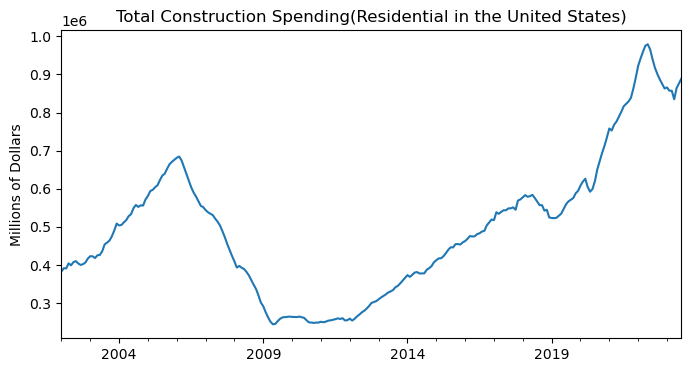

In [15]:
title='Total Construction Spending(Residential in the United States)'
ylabel='Millions of Dollars'
xlabel='' 

ax = df['Total Construction Spending: Residential in the United States'].plot(figsize=(8,4),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

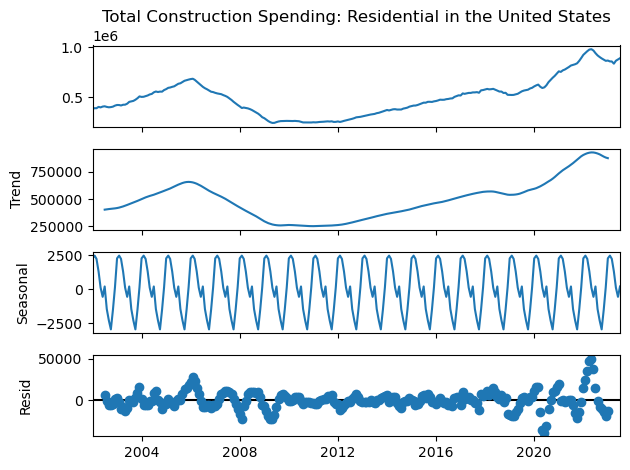

In [16]:
result = seasonal_decompose(df['Total Construction Spending: Residential in the United States'], model='add')
result.plot();

In [17]:
auto_arima(df['Total Construction Spending: Residential in the United States'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2693.103
Date:                Fri, 01 Sep 2023   AIC                           5388.207
Time:                        11:16:31   BIC                           5391.756
Sample:                    01-01-2002   HQIC                          5389.634
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.347e+07    3.2e+06     22.926      0.000    6.72e+07    7.97e+07
===================================================================================
Ljung-Box (L1) (Q):                  46.92   Jarque-Bera (JB):               405.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [19]:
model = SARIMAX(train['Total Construction Spending: Residential in the United States'],order=(0,2,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     SARIMAX Results                                                     
=========================================================================================================================
Dep. Variable:     Total Construction Spending: Residential in the United States   No. Observations:                  247
Model:                                                          SARIMAX(0, 2, 0)   Log Likelihood               -2545.286
Date:                                                           Fri, 01 Sep 2023   AIC                           5092.571
Time:                                                                   11:16:31   BIC                           5096.072
Sample:                                                               01-01-2002   HQIC                          5093.981
                                                                    - 07-01-2022                                         
Covariance Type:                                                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.133e+07   3.59e+06     17.069      0.000    5.43e+07    6.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  34.72   Jarque-Bera (JB):                74.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(0,2,0) Predictions')

In [21]:
predictions

2022-08-01    913776.0
2022-09-01    887964.0
2022-10-01    862152.0
2022-11-01    836340.0
2022-12-01    810528.0
2023-01-01    784716.0
2023-02-01    758904.0
2023-03-01    733092.0
2023-04-01    707280.0
2023-05-01    681468.0
2023-06-01    655656.0
2023-07-01    629844.0
Freq: MS, Name: SARIMAX(0,2,0) Predictions, dtype: float64

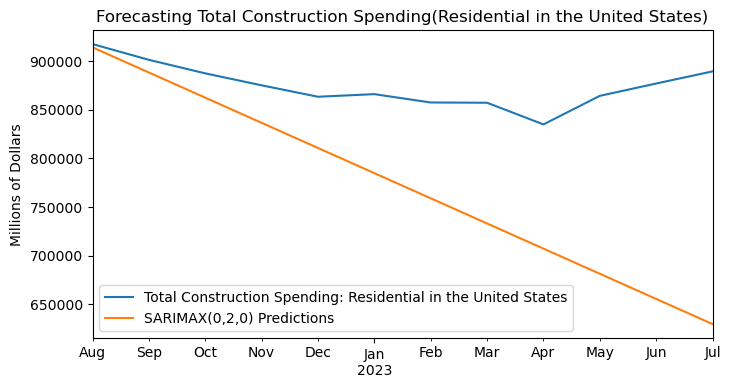

In [10]:
title='Forecasting Total Construction Spending(Residential in the United States)'
ylabel='Millions of Dollars'
xlabel='' 

ax = test['Total Construction Spending: Residential in the United States'].plot(legend=True,figsize=(8,4),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [11]:
error1 = mean_squared_error(test['Total Construction Spending: Residential in the United States'], predictions)
error2 = rmse(test['Total Construction Spending: Residential in the United States'], predictions)
print(f'SARIMAX(0,2,0) MSE Error: {error1:11.10}')
print(f'SARIMAX(0,2,0) RMSE Error: {error2:11.10}')

SARIMAX(0,2,0) MSE Error: 1.685562811e+10
SARIMAX(0,2,0) RMSE Error: 129829.2267


In [12]:
model = SARIMAX(df['Total Construction Spending: Residential in the United States'],order=(0,2,0))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMAX(0,2,0)Forecast')

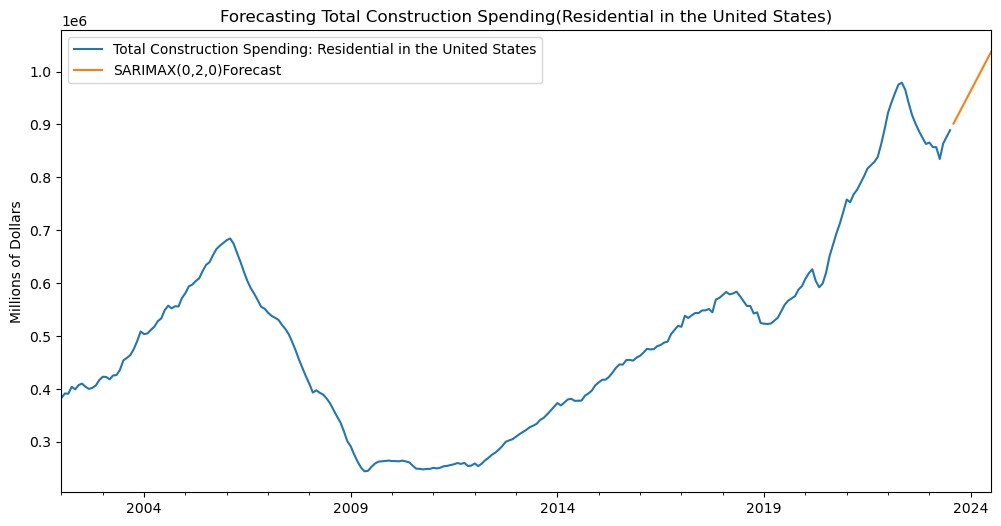

In [13]:
title='Forecasting Total Construction Spending(Residential in the United States)'
ylabel='Millions of Dollars'
xlabel='' 

ax = df['Total Construction Spending: Residential in the United States'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);